<h1>Лабораторна робота 7</h1>
<h3>Лобунько Д.О, Обробка та аналіз БМД, БС-81</h3>

Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам.

In [1]:
import pandas as pd
import seaborn as sns
from math import sqrt


students = pd.read_csv("students_data.csv")
students

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [2]:
groups = pd.DataFrame(columns=['Male', 'Female'])
male = []
female = []

i = 0
i1 = 0
i2 = 0
while True:
    if (students['gender'][i] == 'M' and i1 < 100):
        male.append(students['Discussion'][i])
        i1 += 1
    if (students['gender'][i] == 'F' and i2 < 100):
        female.append(students['Discussion'][i])
        i2 += 1
    i += 1
    if (i1 == i2):
        break
        
groups['Male'] = male            # 2 групи - хлопці і дівчата. В кожній групі по 100 спостережень.
groups['Female'] = female        # Кількісна змінна - кількість відвідувань шкільних обговорень (заходів).
groups                  

,Male,Female
0,20,70
1,25,50
2,30,70
3,35,60
4,50,66
...,...,...
95,89,44
96,40,24
97,41,74
98,91,84


Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

[Text(0.5, 0, 'Number of discussions')]

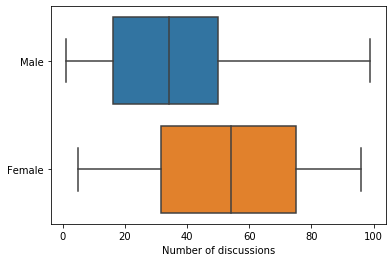

In [3]:
sns.boxplot(data=groups, orient='h').set(xlabel='Number of discussions')

Написати функції:
* для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту  та результат оцінки рівності дисперсій (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def Levene(table):
    keys = table.keys()
    D1 = (table[keys[0]].std())**2
    D2 = (table[keys[1]].std())**2
    F = D1/D2 if D1 > D2 else D2/D1
    df_max = max(len(table[keys[0]]), len(table[keys[1]])) - 1
    df_min = min(len(table[keys[0]]), len(table[keys[1]])) - 1

    Levene_table = pd.read_excel("Levene.xlsx")
    df_index1 = 0
    df_index2 = 0
    for i in range(1,Levene_table.shape[0]-1):
        if (Levene_table.iloc[i,0] <= df_min):
            df_index1 = i
    if (Levene_table.iloc[Levene_table.shape[0]-2,0] < df_min):
        df_index1 = Levene_table.shape[0]-1
        
    for i in range(1,Levene_table.shape[1]-1):
        if (Levene_table.iloc[0,i] <= df_max):
            df_index2 = i
    if (Levene_table.iloc[0,Levene_table.shape[1]-2] < df_max):
        df_index2 = Levene_table.shape[1]-1
    F_table = Levene_table.iloc[df_index1, df_index2]
    
    return F, "significant" if F < F_table else "non significant"

In [5]:
def t_test(table, equal):
    keys = table.keys()
    N1 = len(table[keys[0]])
    N2 = len(table[keys[1]])
    M1 = table[keys[0]].mean()
    M2 = table[keys[1]].mean()
    D1 = (table[keys[0]].std())**2
    D2 = (table[keys[1]].std())**2
    if (equal == True):
        t = abs(M1 - M2)/sqrt((D1/N1)+(D2/N2))
    else:
        t_numerator = abs(M1 - M2)
        t_denominator = sqrt((((N1-1)*D1 + (N2-1)*D2)/(N1+N2-2))*(1/N1 + 1/N2))
        t = t_numerator/t_denominator
    df = N1 + N2 - 2
    Student_table = pd.read_excel("Student.xlsx")
    t_table = 0
    i = 0
    while ((i < len(Student_table)-1) and (df > Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
        i += 1
    if (abs(df-Student_table.iloc[i-1,0])>abs(df-Student_table.iloc[i,0])):
        t_table = Student_table.iloc[i,1]
    return t, df, 'significant' if t < t_table else "non significant"

Перевірити розбіжність на між групами на даних з п. 1.

In [6]:
Levene(groups)

(1.057778685208685, 'significant')

In [7]:
if (Levene(groups)[1] == 'significant'):
    std_equal = True
else:
    std_equal = False
t_test(groups, std_equal)

(4.217801773762504, 198, 'non significant')